In [45]:
%run oanda_initial.py
import matplotlib.pyplot as plt
from scipy import integrate
N =300 # data number
dt =5 # data step [s]
t = np.arange(0, N*dt, dt) # time
close=get_mdata(N,ex_pair)['close']

In [47]:
SPREAD

0.013999999999999999

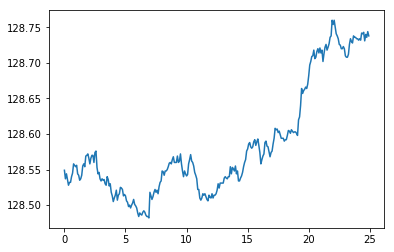

In [39]:
plt.plot(t/60,close)

In [26]:
class CycleAnalysis():
    def __init__(self,PeriodMinutes):
        self.PeriodMinutes=PeriodMinutes # Units:Minutes
        self.PeriodSeconds=PeriodMinutes*60 # Units:Seconds
        self.DataQuantity=int(self.PeriodSeconds/dt)
    def ChartData(self,ShiftQuantity,ShiftNum):
        self.ShiftQuantity=ShiftQuantity # シフト量（一回でどれだけシフトするか）
        self.ShiftNum=ShiftNum # シフト番号（何回目のシフトか(0回目から始まる)）
        self.HeadDataNum=ShiftQuantity*ShiftNum
        self.EndDataNum=self.HeadDataNum+self.DataQuantity
        self.HeadTime=self.HeadDataNum*dt/60 # Units:minutes
        self.EndTime=self.HeadTime+self.PeriodMinutes # Units:minutes
        if self.EndDataNum<=len(close):
            self.t=t[self.HeadDataNum:self.EndDataNum]
            self.Data=close[self.HeadDataNum:self.EndDataNum]
            self.fixa=((np.dot(self.t,self.Data)- self.Data.sum() * self.t.sum()/self.DataQuantity)/((self.t** 2).sum() - self.t.sum()**2 / self.DataQuantity))
            self.fixb=(self.Data.sum() - self.fixa *self.t.sum())/self.DataQuantity
            self.RegressionLine=self.fixa*self.t+self.fixb
            self.FixData=self.Data-self.RegressionLine
            self.a0=1/self.PeriodSeconds*integrate.simps(self.FixData,self.t)
            self.a1=2/self.PeriodSeconds*integrate.simps(self.FixData*np.cos(2*np.pi*self.t/self.PeriodSeconds),self.t)
            self.b1=2/self.PeriodSeconds*integrate.simps(self.FixData*np.sin(2*np.pi*self.t/self.PeriodSeconds),self.t)
            self.A1=np.sqrt(self.a1**2+self.b1**2)
            self.Theta1=np.arctan2(self.a1,self.b1)
            self.A1Sin=self.A1*np.sin(2*np.pi*self.t/self.PeriodSeconds+self.Theta1)
        else: return False
        return True

In [40]:
ca=CycleAnalysis(6)
ca.ChartData(0,0)

True

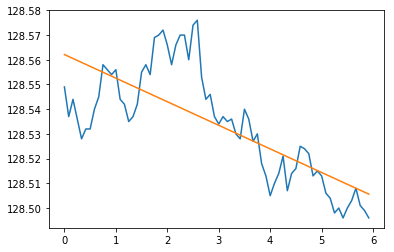

In [41]:
plt.plot(ca.t/60,ca.Data,ca.t/60,ca.RegressionLine)

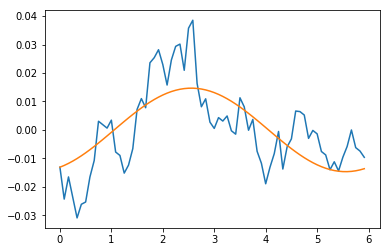

In [42]:
plt.plot(ca.t/60,ca.FixData,ca.t/60,ca.A1Sin)

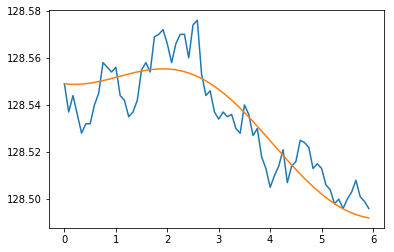

In [43]:
plt.plot(ca.t/60,ca.Data,ca.t/60,ca.A1Sin+ca.RegressionLine)

In [31]:
def fourier(PeriodMinutes):
    ca=CycleAnalysis(PeriodMinutes)
    i=0
    A1list=[]
    while ca.ChartData(5,i):
        A1list.append(ca.A1)
        i+=1
    return np.mean(A1list)

In [34]:
A1AveList=[]
for i in np.arange(0.25,10.5,0.25):
    A1AveList.append(fourier(i))
A1AveList

[0.0020000000000107974,
 0.0031219711460375556,
 0.004195676605814585,
 0.005140853912160798,
 0.0061301395194835705,
 0.0064061258235293345,
 0.006570411890134036,
 0.006712688226900917,
 0.006946439476742633,
 0.007531914683412743,
 0.008284119186164314,
 0.008915230879669825,
 0.009851280552872141,
 0.010880788233073146,
 0.012717595638374673,
 0.013276403633832883,
 0.014374846023615115,
 0.015720912824895572,
 0.01638473668599977,
 0.01794899627211564,
 0.018907472282033166,
 0.02026606675653008,
 0.021209486494961353,
 0.021855602166912784,
 0.022509215166712847,
 0.022921990379189648,
 0.023527907457182414,
 0.024099597308088413,
 0.024483039880169942,
 0.0249542185371244,
 0.025079863788761574,
 0.025183781824805834,
 0.02538957628004573,
 0.024855619157036483,
 0.024987382669629212,
 0.024678093576716503,
 0.02430737129760631,
 0.024315113920521405,
 0.023554905870105496,
 0.023626876846929087,
 0.02312744461926154]

In [50]:
A1AveList-SPREAD

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [52]:
np.array(A1AveList)-SPREAD

array([-0.012     , -0.01087803, -0.00980432, -0.00885915, -0.00786986,
       -0.00759387, -0.00742959, -0.00728731, -0.00705356, -0.00646809,
       -0.00571588, -0.00508477, -0.00414872, -0.00311921, -0.0012824 ,
       -0.0007236 ,  0.00037485,  0.00172091,  0.00238474,  0.003949  ,
        0.00490747,  0.00626607,  0.00720949,  0.0078556 ,  0.00850922,
        0.00892199,  0.00952791,  0.0100996 ,  0.01048304,  0.01095422,
        0.01107986,  0.01118378,  0.01138958,  0.01085562,  0.01098738,
        0.01067809,  0.01030737,  0.01031511,  0.00955491,  0.00962688,
        0.00912744])

In [35]:
A1AveList/np.arange(0.25,10.5,0.25)

array([0.008     , 0.00624394, 0.00559424, 0.00514085, 0.00490411,
       0.00427075, 0.00375452, 0.00335634, 0.00308731, 0.00301277,
       0.00301241, 0.00297174, 0.00303116, 0.0031088 , 0.00339136,
       0.0033191 , 0.00338232, 0.00349354, 0.00344942, 0.0035898 ,
       0.00360142, 0.00368474, 0.00368861, 0.0036426 , 0.00360147,
       0.00352646, 0.00348562, 0.0034428 , 0.00337697, 0.00332723,
       0.00323611, 0.00314797, 0.00307752, 0.00292419, 0.0028557 ,
       0.00274201, 0.00262782, 0.00255949, 0.00241589, 0.00236269,
       0.00225634])

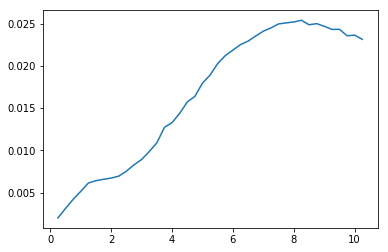

In [36]:
plt.plot(np.arange(0.25,10.5,0.25),A1AveList)

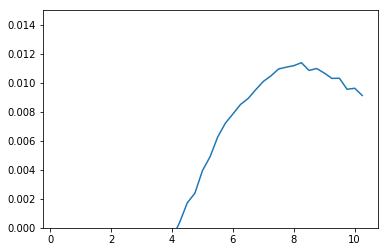

In [58]:
plt.ylim(0,0.015)
plt.plot(np.arange(0.25,10.5,0.25),np.array(A1AveList)-SPREAD)

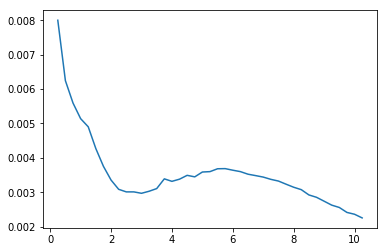

In [37]:
plt.plot(np.arange(0.25,10.5,0.25),A1AveList/np.arange(0.25,10.5,0.25))

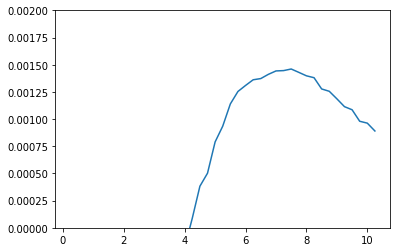

In [57]:
plt.ylim(0,0.002)
plt.plot(np.arange(0.25,10.5,0.25),(np.array(A1AveList)-SPREAD)/np.arange(0.25,10.5,0.25))